<!-- html title in the middle -->
<p style="text-align: center;">
    <h1 style="text-align: center;">Time Series Data Generator Library</h1>
    <h3 style="text-align: center;">A tool for generating synthetic time series data</h3>
</p>





In [1]:
# Import the DataGen class from the ts_data_generator module and some utility functions 
from ts_data_generator import DataGen
from ts_data_generator.schema.models import Granularity
from ts_data_generator.utils.trends import SinusoidalTrend, LinearTrend, WeekendTrend, StockTrend
from ts_data_generator.utils.functions import random_choice
import matplotlib.pyplot as plt

In [2]:
d = DataGen()
d.start_datetime = "2019-01-01"
d.end_datetime = "2019-01-12"
d.granularity = Granularity.FIVE_MIN
d.add_dimension("product", random_choice(["A", "B", "C", "D"]))

metric1_trend = SinusoidalTrend(name="sine", amplitude=6, freq=3, phase=0, noise_level=1.5)

d.add_metric(name="sinusoidal", trends=[metric1_trend])

metric2_trend = SinusoidalTrend(name="sine", amplitude=3, freq=5, phase=0, noise_level=1.5)
metric3_trend = LinearTrend(name="linear", limit=30, offset=10, noise_level=1)

d.add_metric(name="sinusoidal_linear", trends=[metric2_trend,metric3_trend])

metric4_trend = WeekendTrend(name="weekend", weekend_effect=10, direction="up", noise_level=0.5, limit=10)
d.add_metric(name="weekend_trend", trends=[metric4_trend])

metric5_trend = StockTrend(name='stock', amplitude=10, direction='up', noise_level=0.5)
metric5_linear = LinearTrend(name='Linear', offset=0, noise_level=1, limit=10)
d.add_metric(name="stock_like_trend", trends=[metric5_trend, metric5_linear])

d.generate_data()

<Axes: >

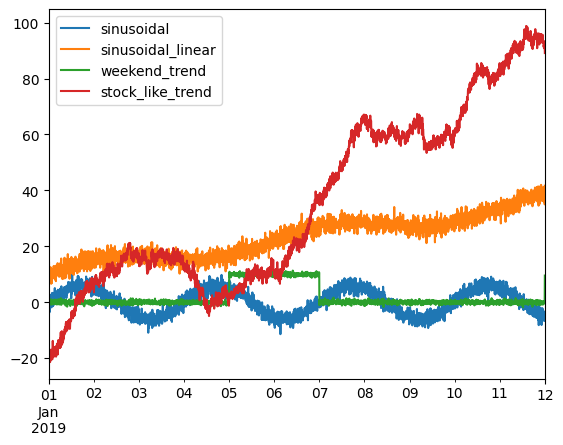

In [3]:
d.data.plot()

In [4]:
d.data

,product,sinusoidal,sinusoidal_linear,weekend_trend,stock_like_trend
2019-01-01 00:00:00,A,1.950926,12.740368,-0.477038,-21.042798
2019-01-01 00:05:00,C,0.442955,14.458035,-0.490026,-21.221544
2019-01-01 00:10:00,D,0.870499,10.763515,0.640031,-20.647505
2019-01-01 00:15:00,C,0.595769,10.680572,-0.282300,-20.543945
2019-01-01 00:20:00,D,-3.575477,11.510694,-0.621613,-20.642409
...,...,...,...,...,...
2019-01-11 23:40:00,C,-6.691444,39.992035,-0.132049,92.710509
2019-01-11 23:45:00,C,-4.376501,36.553230,-0.359350,93.276335
2019-01-11 23:50:00,B,-3.475949,38.678489,0.189273,90.971415
2019-01-11 23:55:00,B,-5.749306,35.022086,0.236608,92.150100
